# Day 9 - 2D & 3D movies

### Topics
 1. Intro to data & files
 1. Brief review -- planet data
 1. 2D Movies
 1. 3D movies (with `ipyvolume`).

## Intro to data & files
Let's make some movies!

First, make sure you've downloaded **and unzipped** the zip file that stores the simulation data we are using today.  Link to this file [is right here](https://github.com/jnaiman/csci-p-14110_su2020/raw/master/lesson09/data.zip).  I recommend unzipping it 

This link was generated by running some simulations of a few of the planetary systems in the NASA exoplanet database.  See the [Extra notebook in this lesson](extra_notebook_generate_sims.ipynb) for more details.

We'll also make use of an additional library, [hermite_library.py](https://raw.githubusercontent.com/jnaiman/csci-p-14110_su2020/master/lesson09/hermite_library.py), to do some additional reading and writing of data, so make sure that is downloaded and in the same directory as this notebook file.

## Brief review -- planet data

Start by importing our usual things:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#%matplotlib inline

Last time we did some info-viz type things with the planet dataset:

In [4]:
planets = pd.read_csv('https://jnaiman.github.io/csci-p-14110_su2020/lesson08/planets_2020.06.22_10.10.17.csv', 
                     sep=",", comment="#")

In [5]:
planets.head()

,rowid,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,...,st_bmy,st_bmyerr,st_bmylim,st_m1,st_m1err,st_m1lim,st_c1,st_c1err,st_c1lim,st_colorn
0,1,11 Com,b,11 Com b,Radial Velocity,0,1,326.03000,0.32,-0.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,2,11 UMi,b,11 UMi b,Radial Velocity,0,1,516.21997,3.20,-3.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,3,14 And,b,14 And b,Radial Velocity,0,1,185.84000,0.23,-0.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
3,4,14 Her,b,14 Her b,Radial Velocity,0,1,1773.40002,2.50,-2.50,...,0.537,0.001,0.0,0.366,0.002,0.0,0.438,0.006,0.0,9.0
4,5,16 Cyg B,b,16 Cyg B b,Radial Velocity,0,1,798.50000,1.00,-1.00,...,0.418,0.003,0.0,0.222,0.003,0.0,0.351,0.003,0.0,17.0


And we made some beginning plots with this data (before we did some more complex stuff with `bqplot`):

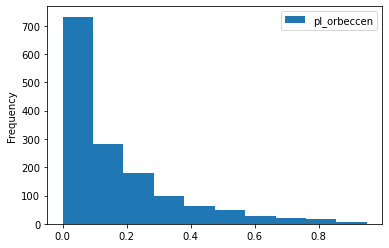

In [6]:
planets.plot(y='pl_orbeccen', kind='hist')

We know from our understanding of ellipses that things like eccentricity (along with others like semi-major axis) define the shape of the orbits of planets in these exoplanetary systems:

<img src="https://lh3.googleusercontent.com/proxy/GAwQoETXLFQ0EUb7JL1OnIZ-Uk--ctcIgjoVyzVuIshu7r1szxPkFIhH0POApb1-Ve5vqF1HFeIOMjcuk42swSB5pItm2FDrihf51E5bb9rtPzciFnK4" width=400>

We can use this information to do numerical simulations of these planetary orbits.  This was a big part of the last iteration of this class which you can see in lessons01-05 on [the Summer 2019 page](https://jnaiman.github.io/csci-p-14110_su2019/).  We will gloss over it now, but you can check out the [extra notebook for this week](extra_notebook_generate_sims.ipynb) if you are curious!.

What will use is simulations of several multi-planet systems from the NASA database.  Some creative license has been used to translate the NASA parameters into initial conditions for the simulation when data is missing.

## 2D movies

To start, let's check out the simulation data and make some quick plots.

To read in the data make sure the ```hermite_library.py``` file is located in the same directory were you are running this all from.

In [7]:
from hermite_library import read_hermite_solution_from_file # reader for sim data

Next, we have to choose what system we want to make a movie of.  Assuming the data directory has been downloaded and unzipped to the current directory, we can check out whats in it with a:

In [8]:
!ls data

55_Cnc-savedSim.txt     HD_215152-savedSim.txt  Kepler-411-savedSim.txt
DMPP-1-savedSim.txt     HD_219134-savedSim.txt  Kepler-62-savedSim.txt
GJ_3293-savedSim.txt    HD_34445-savedSim.txt   Kepler-79-savedSim.txt
GJ_667_C-savedSim.txt   HD_40307-savedSim.txt   Kepler-80-savedSim.txt
GJ_676_A-savedSim.txt   K2-266-savedSim.txt     Kepler-82-savedSim.txt
GJ_876-savedSim.txt     K2-285-savedSim.txt     TRAPPIST-1-savedSim.txt
HD_10180-savedSim.txt   KOI-94-savedSim.txt     WASP-47-savedSim.txt
HD_141399-savedSim.txt  Kepler-107-savedSim.txt myPlanetarySystem.txt
HD_160691-savedSim.txt  Kepler-11-savedSim.txt  tau_Cet-savedSim.txt
HD_20781-savedSim.txt   Kepler-20-savedSim.txt
HD_20794-savedSim.txt   Kepler-32-savedSim.txt


What is listed here are the simulated orbits for several different exoplanetary systems (plus a made-up one called "myPlanetarySystem.txt").  Let's pick one to read in and check out:

In [9]:
planet_file = 'data/Kepler-11-savedSim.txt'

t_h, E_h, r_h, v_h = read_hermite_solution_from_file(planet_file)

There are several outputs from the `read_hermite_solution_from_file` function.  The one we'll start looking at is `r_h` which gives the 3D vector that holds the positions of all the planets & central star at different timesteps in the simulation.

The order of this vector is:
```
r_h[planet number, index for x/y/z, time step]
```

The other outputs are:
 * `t_h` is the time at each timestep (in seconds)
 * `v_h` is the velocity of each planet/star in the system as a function of time (same format as `r_h`)
 * `E_h` gives the energy of the system as a function of time (if you have done a bit of physics you can check this to see how well energy is conserved and how much is lost to numerical artifacts)

Let's make a quick plot to see what this system looks like:

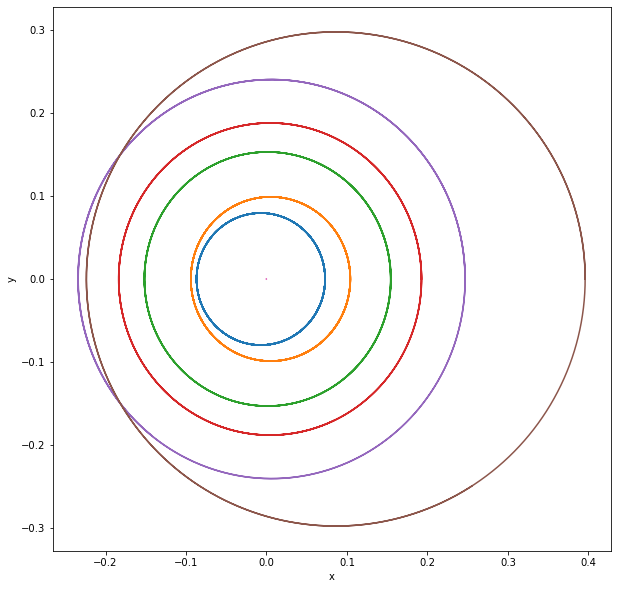

In [12]:
# first create an axis object to hold our 2 horizontal plots
fig, ax = plt.subplots(1,1, figsize=(10, 10))
# figsize makes sure we are 2x times wider than higher

# loop over the number of particles in our system
for i in range(r_h.shape[0]):
    # on the 0th i.e. first set of axis plot
    # the ith planet
    # the 0th (x) axis vs the 1st (y) axis
    # and plot all the time steps (:)
    ax.plot(r_h[i,0,:], r_h[i, 1, :])
    
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

So this is just plotting x vs. y, but what about the z-dimension?  Let's plot x vs z instead:

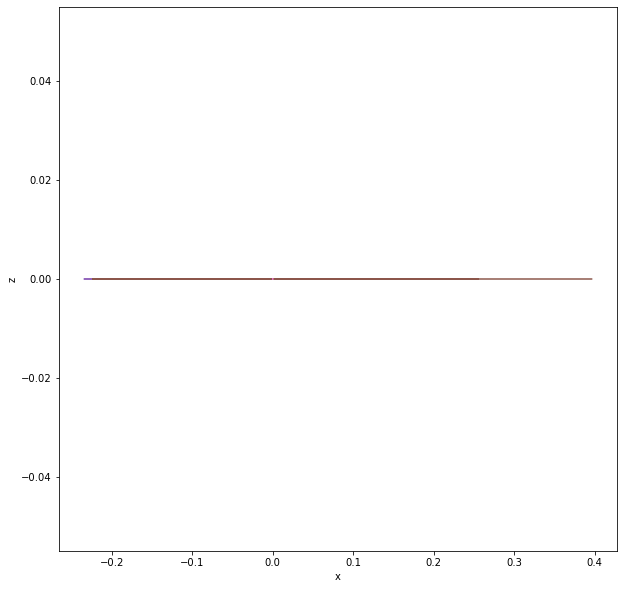

In [13]:
# first create an axis object to hold our 2 horizontal plots
fig, ax = plt.subplots(1,1, figsize=(10, 10))
# figsize makes sure we are 2x times wider than higher

# loop over the number of particles in our system
for i in range(r_h.shape[0]):
    # on the 0th i.e. first set of axis plot
    # the ith planet
    # the 0th (x) axis vs the 2nd (z) axis
    # and plot all the time steps (:)
    ax.plot(r_h[i,0,:], r_h[i, 2, :])
    
ax.set_xlabel('x')
ax.set_ylabel('z')
plt.show()

As expected, all of the orbits lie in a plane so this just looks like a straight line.

Fun questions:
 * is this true for all of the NASA systems?
 * what about my "by hand" planetary system?

We can also make a 1x3 plot that shows how everything varies with everything:

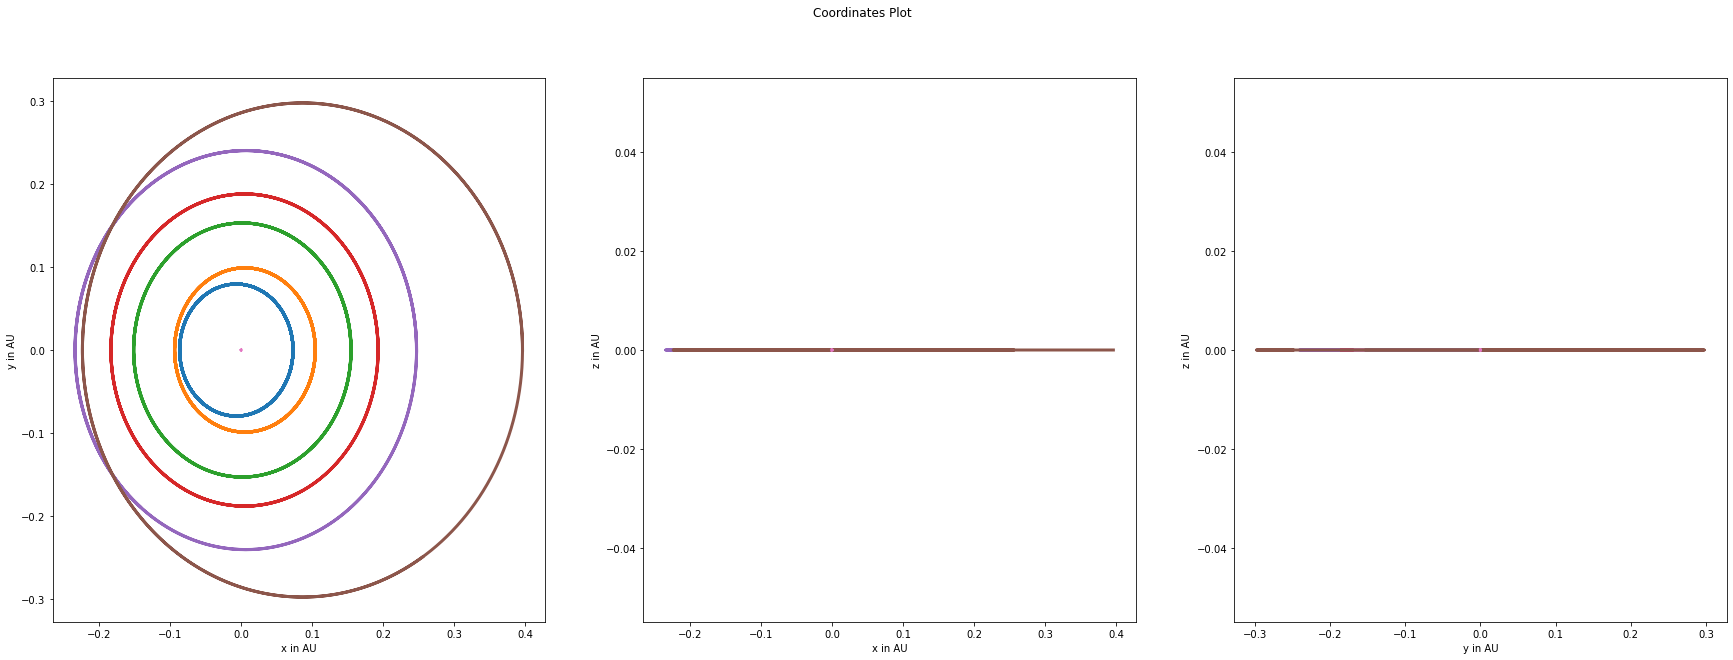

In [14]:
# we can test-replot like we did before:
fig, ax = plt.subplots(1, 3, figsize = (10*3, 10))
fig.suptitle('Coordinates Plot')

# set the labels along the horizontal (x)
#   and vertical axis
# **COMMENT ALL THESE**
ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

ax[1].set_xlabel('x in AU')
ax[1].set_ylabel('z in AU')

ax[2].set_xlabel('y in AU')
ax[2].set_ylabel('z in AU')

# plot Euler's solution, particle 1, x-y
for i in range(r_h.shape[0]):
    ax[0].plot(r_h[i,0,:], r_h[i,1,:], lw=3)

for i in range(r_h.shape[0]):
    ax[1].plot(r_h[i,0,:], r_h[i,2,:], lw=3)

for i in range(r_h.shape[0]):
    ax[2].plot(r_h[i,1,:], r_h[i,2,:], lw=3)
    

plt.show()

Note my system here is pretty 2D and not exciting, your's might be very different!

## Animations

How would we make an animation of this?  We will basically make "frames" of data - one for each timestep, or subset of times (more on that in a moment) and then plot this.  

Let's make an animation of our face-on plot:

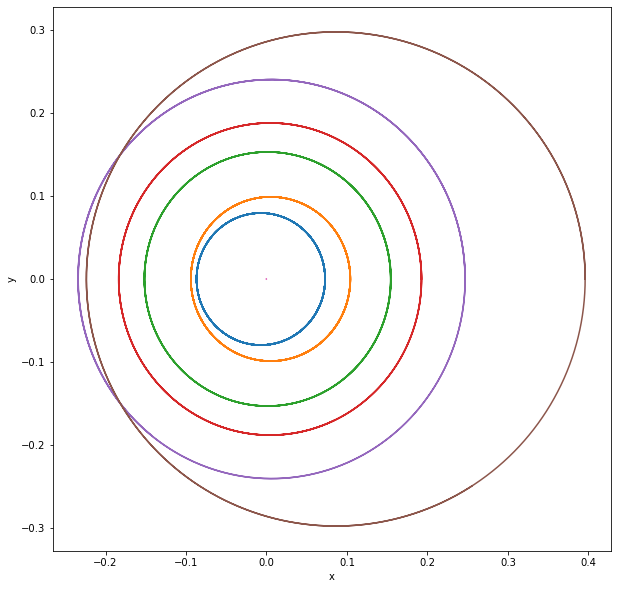

In [15]:
# first create an axis object to hold our 2 horizontal plots
fig, ax = plt.subplots(1,1, figsize=(10, 10))
# figsize makes sure we are 2x times wider than higher

# loop over the number of particles in our system
for i in range(r_h.shape[0]):
    # on the 0th i.e. first set of axis plot
    # the ith planet
    # the 0th (x) axis vs the 1st (y) axis
    # and plot all the time steps (:)
    ax.plot(r_h[i,0,:], r_h[i, 1, :])
    
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

To do an animation, let's start by importing some things we need.  This *may* be different on differenet systems & different versions of things.  I'll list a few options and then go through the one that works on my machine.

#### Using JSAnimation (old matplotlib)

You *may* have to install JSAnimation to get `animation` to import.  Try this first:

In [ ]:
#!conda update matplotlib --yes

And if not try:

In [7]:
#!conda install -c conda-forge jsanimation --yes

or:

In [9]:
# if you get an error try:
#!pip install JSAnimation

#from JSAnimation.IPython_display import display_animation

In [16]:
from matplotlib import animation

So, we should expect that if we make a movie of this developing, this should be the final frame of our movie.

One thing we need to be aware of is that the more time steps we want to show, i.e. the number of `frames`, the longer it will take to generate this animation, and the longer it will take to save to a file.  So we are going to *subsample* our dataset for outputing purposes.

In [10]:
# plot how many steps?  i.e. every X number of steps?
# we probably don't want a huge movie with every step
stepSize = 50

In [11]:
# r_h[number of particles, number of coords, number of times]
# subsample
# we will subsample time with indexing like: start:stop:step
r = r_h[:,:,0:-1:stepSize]
t = t_h[0:-1:stepSize]
E = E_h[0:-1:stepSize]

r.shape, r_h.shape

((3, 3, 100), (3, 3, 5000))

What do we think the last frame of our animation should look like?

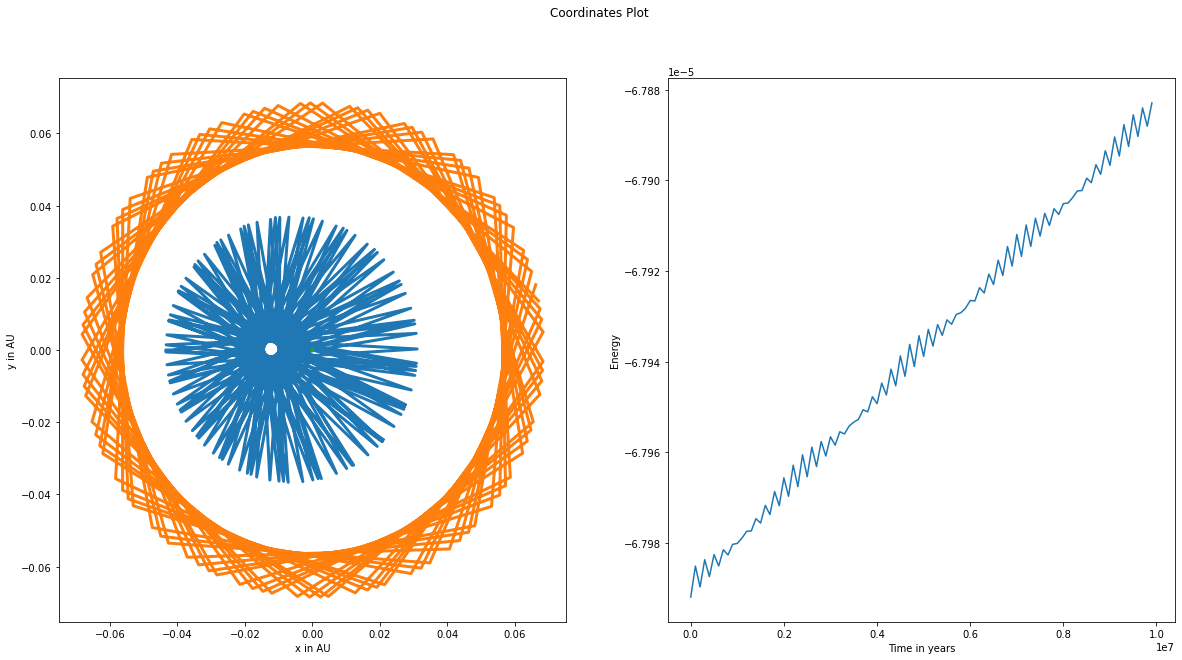

In [12]:
# let's plot!
fig, ax = plt.subplots(1, 2, figsize = (10*2, 10))
fig.suptitle('Coordinates Plot')

ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

# recall:
# r[NUMBER OF PARTICLES, NUMBER COORDINATES (X,Y,Z), NUMBER OF TIMESTEPS]
for i in range(r.shape[0]):
    ax[0].plot(r[i,0,:], r[i,1,:], lw=3)

ax[1].set_xlabel('Time in years')
ax[1].set_ylabel('Energy')
# re-norm energy
ax[1].plot(t, E)

plt.show()

Now that we have what we want to plot, let's use a library to import and make animations:

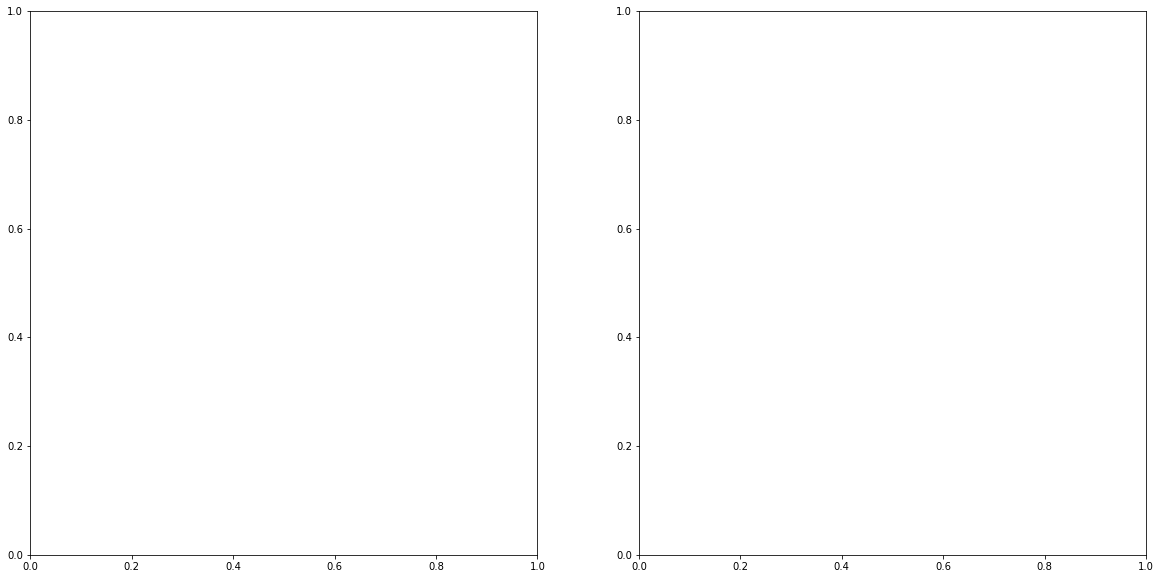

In [13]:
# initalize our figure
fig, ax = plt.subplots(1, 2, figsize = (10*2, 10))
# empty fig shows up

In [14]:
from animations_library import plot_animations

In [15]:
init, animate, nFrames = plot_animations(fig, ax, t, E, r)

Notes: above modified following https://stackoverflow.com/questions/20624408/matplotlib-animating-multiple-lines-and-text

In [16]:
# if you get "TypeError: a bytes-like object is required, not 'str'"
#!conda update matplotlib --yes

In [17]:
%matplotlib notebook

In [18]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nFrames, interval=20, blit=True)
plt.show()

In [19]:
# call our new function to display the animation
#display_animation(anim)
#anim

In [19]:
#display_animation?

Ok, the above is pretty neat (looks cool with the short number of frames we have here).  The reason it looks so groovy is because we are only using one out of every 50 time steps.  You can see that already we are mis-leading our viewer, but we might want to start this way because higher resolution animations will take longer to run.  

Before using your own sims, you might want to know how do we save it as a movie we can post places?  Turns out that is relatively easy with a few lines of code:

Easiest:

In [29]:
anim.save?

In [31]:
#anim.save('myAnimation.gif', writer='imagemagick')
#anim.save('myAnimation.gif')

# NOTE: you will have to specifiy this image writer after installing ffmpeg

And then you can double click from your notebook folder and it will pop up in your browser.  Another option is to make an mp4:

In [22]:
# note: if you get a "ffmpeg not found" error try:

# I think its this one 
#  you might have to restart kernel after this
#!conda install -c conda-forge ffmpeg --yes 

# probably not this one
#!pip install imageio-ffmpeg



In [23]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

In [24]:
# save!
anim.save('anim.mp4', writer=writer)

In [27]:
from IPython.display import Video

#Video("anim.mp4")
Video("anim.mp4",width=800)

In [26]:
Video?

### Exercise
Repeat making movies using this method for your own system.  

**Optional**: modifyin the plotting library code

Try different x/y/z combinations or make a 1x4 plot like we did with still images.  Think about any symbols you want to add - arrows? How would you add a dot to show where the planet is? (Hint: google "matplotlib marker styles")

Hint: start with one change - how would you change the colors of the plots?  If you wanted to figure out how to plot different symbols, how would you do that?

**Note**: for this you will have to modify the library code and then re-import your the library by doing *Kernel -> Restart+Run all* 

You can also just copy-paste the code in your notebook and go from there.